Considere o desenho

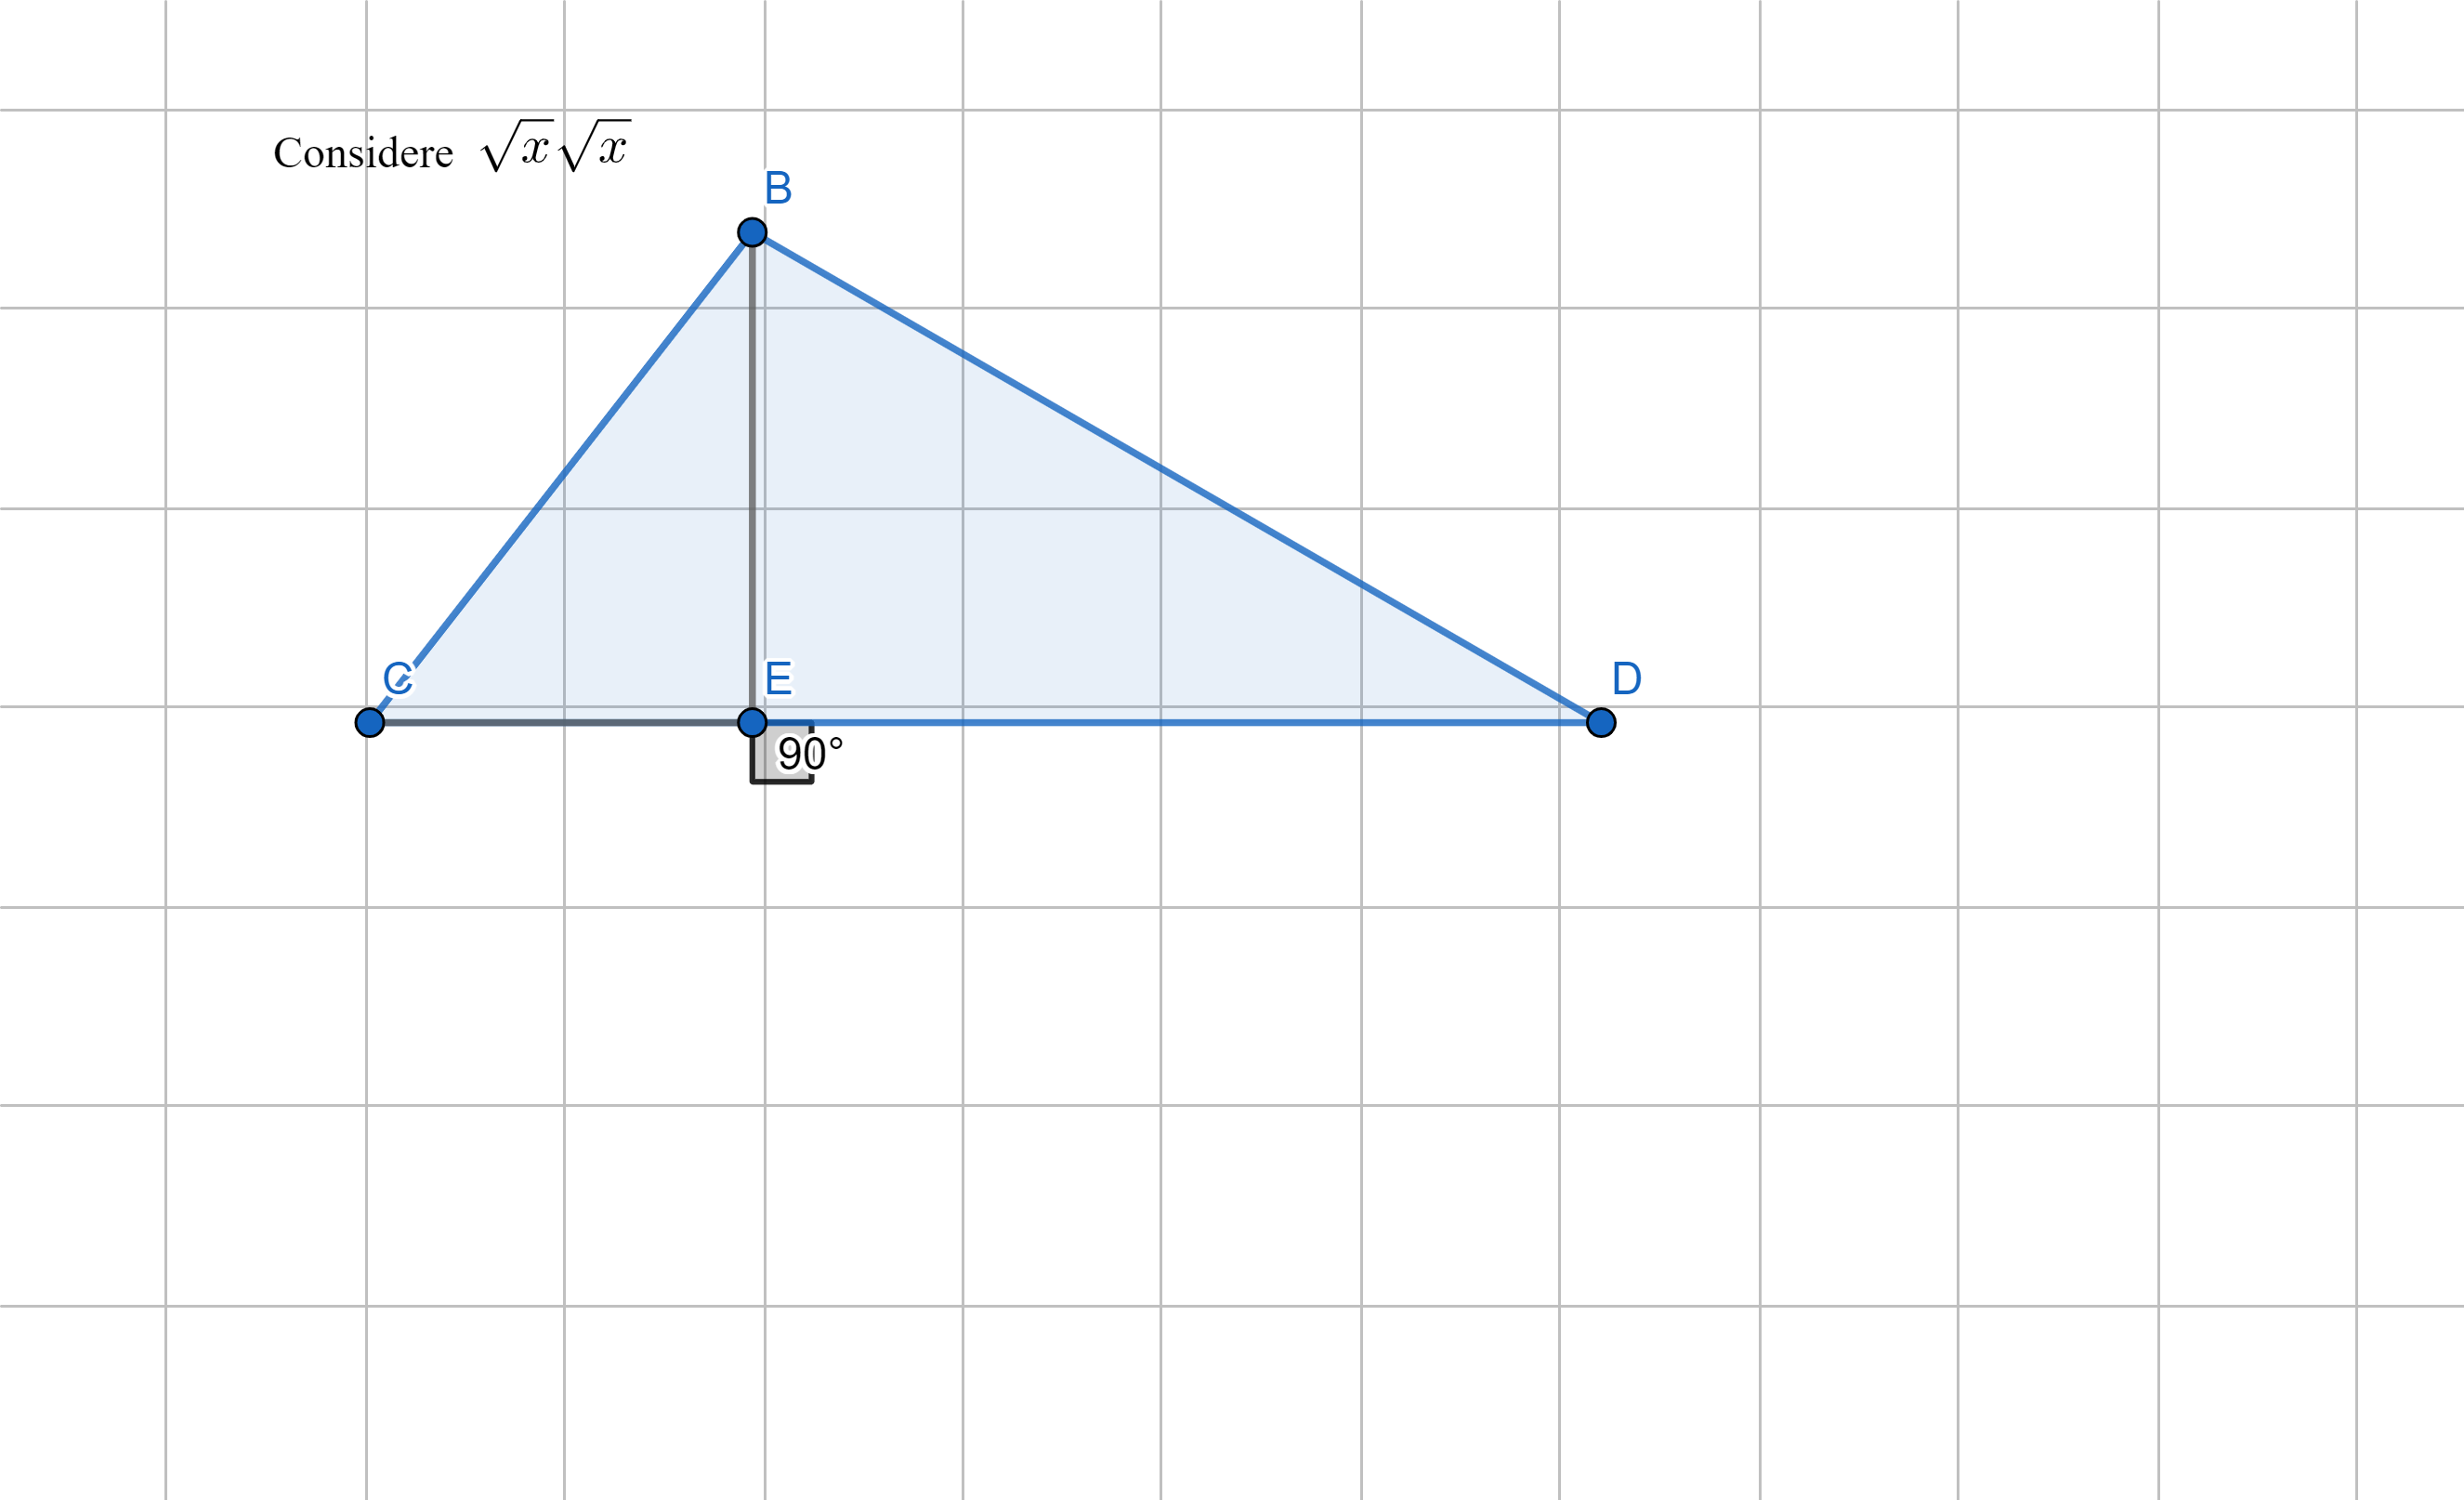


In [ ]:
1+1

In [3]:
#The Plot

from sympy import symbols

a,b,c,d,e,f = symbols('a,b,c,d,e,f')


#declaração do enredo (nome da equação = equação-em-si-mesma)

eq1 = f == a+b
pyt1 = c^2 + d^2 == f^2
pyt2 = b^2 + e^2 == c^2
pyt3 = a^2 + e^2 == d^2
sima1 = c*e==b*d
sima2 = a*c==d*e
sima3 = a*b==e^2
simb1 = c*d==e*f
simb2 = d^2==a*f
simc1 = c^2==b*f
a20   = a==20
b10   = b==10
c10   = c==10
e10   = e==10

# declaração do dicionário de variáveis (certamente pode ser automatizado)

scenary = { 
       eq1: {a,b,f},  #eq1 é a equação acima definida e que serve de "key" do dicionário.
      pyt1: {c,d,f},
      pyt2: {b,e,c},
      pyt3: {a,e,d},
      sima1:{c,e,b,d},
      sima2:{a,c,d,e},
      sima3:{a,b,e},
      simb1:{c,d,e,f},
      simb2:{d,a,f},
      simc1:{c,b,f},
      a20: {a},
      #b10: {b},
      c10: {c},
      #e10: {e},
     }

TypeError: unsupported operand type(s) for ^: 'Symbol' and 'Add'

In [3]:
#as keys são as equações.
scenary.keys()

dict_keys([f == a + b, c^2 + d^2 == f^2, b^2 + e^2 == c^2, a^2 + e^2 == d^2, c*e == b*d, a*c == d*e, a*b == e^2, c*d == e*f, d^2 == a*f, c^2 == b*f, a == 20, c == 10])

In [20]:
import  wisdomgraph as ws
reload(ws)
sc = ws.Scenario(scenary)
sc.build_solvercandidates(r=[1,2])
sc.build_wisdomgraph()
sc.wisdomgraph

Digraph on 64 vertices (use the .plot() method to plot)

In [3]:
sc.allvars

{f, c, a, d, b, e}

In [4]:
#sc.wisdomgraph.plot(edge_labels=True).save("graph.svg",figsize=[100,100], title="Wisdom Graph")
#sc.wisdomgraph.plot(edge_labels=True).show(figsize=[100,100], title="Wisdom Graph")
#P = sc.graph_designer()
#P.show()

In [13]:

def setpos(varlist=[a,b,c,d,e,f], figsize=[10,10]):
    
    nvars = len(varlist)

    comb_length = [ len( Combinations(varlist,i).list() ) for i in range(nvars+1) ]

    #Debug
    #print comb_length #[1, 6, 15, 20, 15, 6, 1]
    maxcomb = max(comb_length) #20

    
    dx = figsize[0] / (nvars-1)
    dy = figsize[1] / (maxcomb-1)
    
    def sx(i):
        return i*dx

    def sy(j,numcases):
        return (j - numcases//2)*dy

    def join_varnames(varlist):
        nname = "".join( sorted( [str(v) for v in varlist] ) )   
        if nname=="":
            nname = 'ignorancia'
        elif nname == "abcdef":
            nname = 'conhecimento'
        return nname




    #maxsize = max( [len(l) for l in comb] )
    #print maxsize

    pos_dic = dict()

    for i in range(nvars+1):

        #Debug
        #print "nvars=",i+1
        
        xpos = sx(i)

        combs = Combinations(varlist,i).list() 
        #Debug
        #print "combs=", combs

        for j in range(comb_length[i]):

            ypos = sy(j,comb_length[i])

            #Debug
            #print join_varnames(combs[j]), " fica em (", xpos, ", ", ypos, ")"
            pos_dic[join_varnames(combs[j])] = [xpos,ypos]

    return pos_dic




pos_dic = setpos()

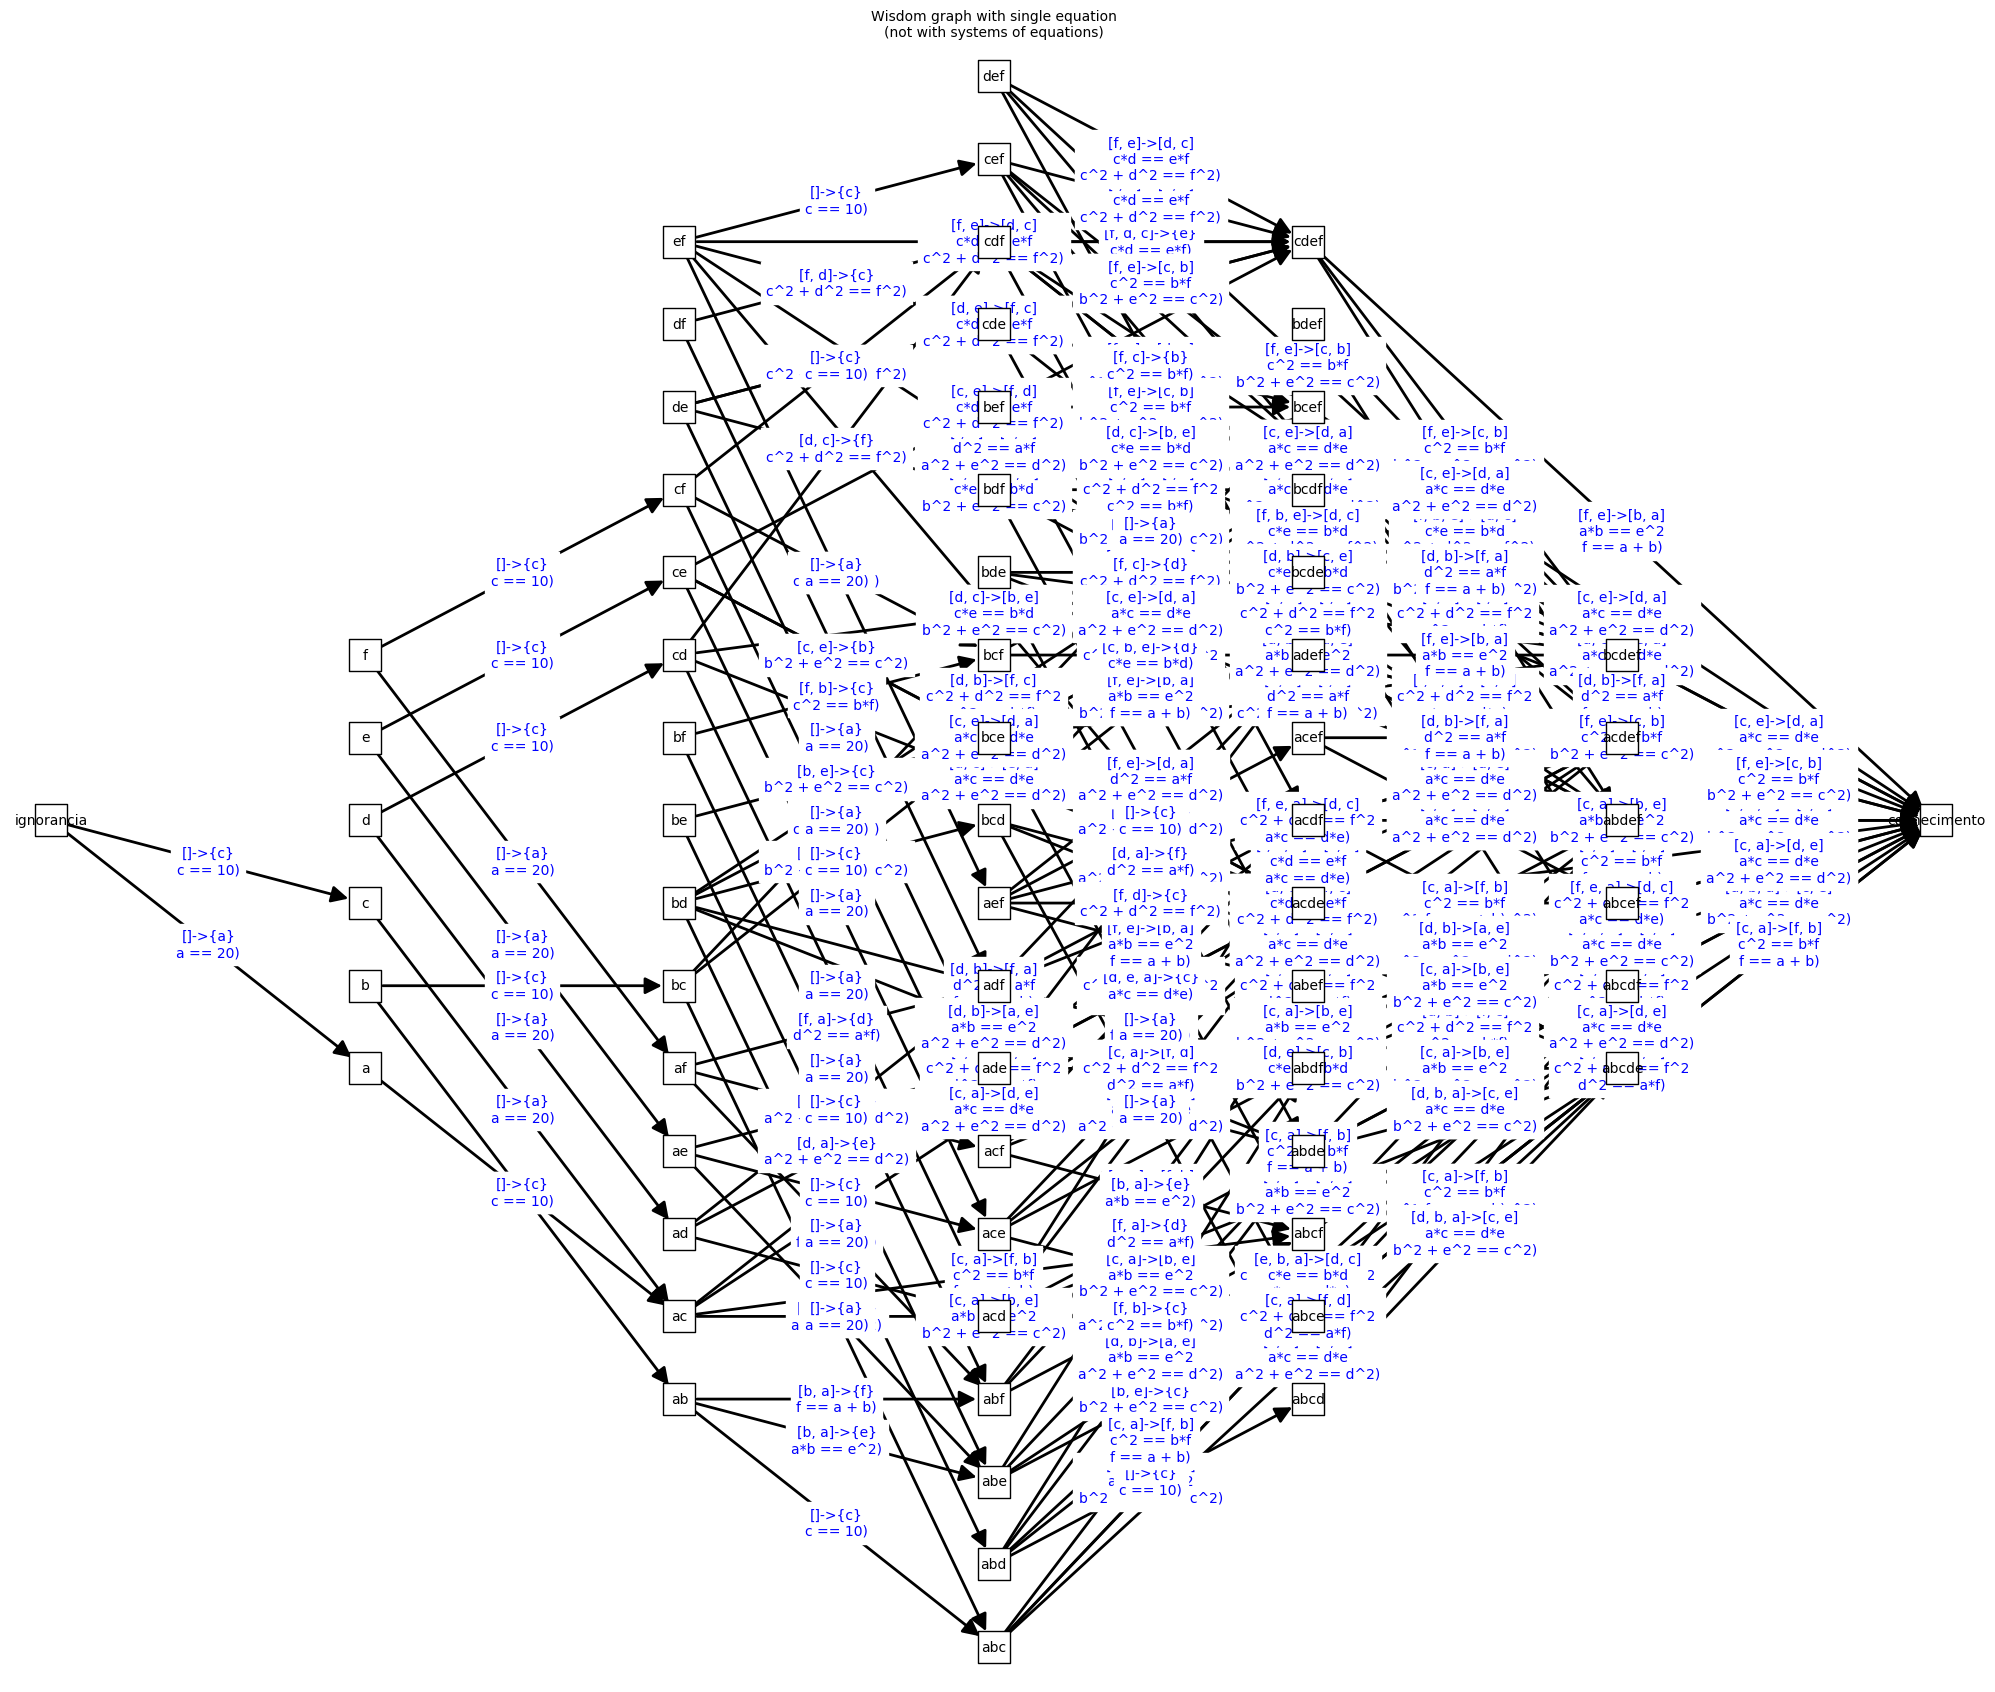

In [21]:
P = sc.wisdomgraph.graphplot(
    
                vertex_size=50,
                vertex_shape="s",
                vertex_labels=True,
                pos = pos_dic,
    
                talk=True,
    
                edge_labels=True,
    
                title="Wisdom graph with single equation\n(not with systems of equations)"
                
)

P.show(figsize=[20,20])        

In [7]:
#sc.solvers

In [45]:
G = sc.wisdomgraph   #.shortest_paths('conhecimento')
P5 = DiGraph( {'0':'1', '1':'2', '2':'3', '3':'4'} )
P6 = DiGraph( {'0':'1', '1':'2', '2':'3', '3':'4', '4':'5'} ) 
P7 = DiGraph( {'0':'1', '1':'2', '2':'3', '3':'4', '4':'5', '5':'6'} ) 
Caminhos = P5
lenC = len(Caminhos); print lenC

5


In [46]:
from sage.graphs.generic_graph_pyx import SubgraphSearch
S = SubgraphSearch(G,Caminhos)
print S.cardinality()

#se o vertice nao começa com ignorancia nao interessa nste primeiro estudo
S_start_in_ignorance = [p for p in S if p[0]=='ignorancia' and p[-1]=='conhecimento']
print len(S_start_in_ignorance)

444
8


In [47]:
for g in S_start_in_ignorance:
    print "Trajeto:", g
    for i in range(lenC-1):
        print "Nivel de conhecimento:", g[i]
        print "   Aplica-se:"
        txtoperadores = G.edge_label(g[i],g[i+1])
        print '\n'.join(" " * 6 + line for line in  txtoperadores.splitlines())
        



Trajeto: ['ignorancia', 'a', 'ac', 'abce', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{a}
      a == 20)
Nivel de conhecimento: a
   Aplica-se:
      []->{c}
      c == 10)
Nivel de conhecimento: ac
   Aplica-se:
      [c, a]->[b, e]
      a*b == e^2
      b^2 + e^2 == c^2)
Nivel de conhecimento: abce
   Aplica-se:
      [c, a]->[f, d]
      c^2 + d^2 == f^2
      d^2 == a*f)
Trajeto: ['ignorancia', 'a', 'ac', 'abcf', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{a}
      a == 20)
Nivel de conhecimento: a
   Aplica-se:
      []->{c}
      c == 10)
Nivel de conhecimento: ac
   Aplica-se:
      [c, a]->[f, b]
      c^2 == b*f
      f == a + b)
Nivel de conhecimento: abcf
   Aplica-se:
      [c, a]->[d, e]
      a*c == d*e
      a^2 + e^2 == d^2)
Trajeto: ['ignorancia', 'a', 'ac', 'acde', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{a}
      a == 20)
Nivel de conhecimento: a
   Aplica-se:
      []->{

In [12]:
PS = GS.graphplot(
    
                vertex_size=50,
                vertex_shape="s",
                vertex_labels=True,
                pos = pos_dic,
    
                talk=True,
    
                edge_labels=True,
    
                title="Wisdom graph with single equation\n(not with systems of equations)"
                
)

PS.show(figsize=[20,20]) 

NameError: name 'GS' is not defined

In [ ]:
x = {a,b}

In [ ]:
type(x)